In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
df=pd.read_csv("cats_vs_dogs.csv")
df.head()

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [36]:
print(df.columns)

Index(['Unnamed: 0', 'state', 'n_households', 'percent_pet_households',
       'n_pet_households', 'percent_dog_owners', 'n_dog_households',
       'avg_dogs_per_household', 'dog_population', 'percent_cat_owners',
       'n_cat_households', 'avg_cats_per_household', 'cat_population'],
      dtype='object')


In [38]:
df = df.drop(['Unnamed: 0', 'state'], axis=1)
df

,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191
5,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796
6,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187
7,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63
8,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375
9,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162


In [40]:
df = df.dropna()
df

,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191
5,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796
6,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187
7,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63
8,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375
9,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162


In [42]:
X = df.drop('cat_population', axis=1)
y = df['cat_population']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.2f}")

 Mean Squared Error (MSE): 15584.28
 R² Score: 0.96


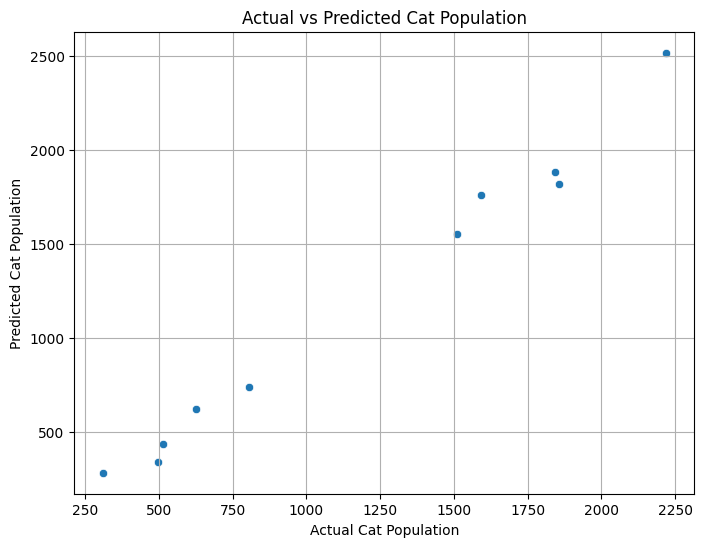

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Cat Population")
plt.ylabel("Predicted Cat Population")
plt.title("Actual vs Predicted Cat Population")
plt.grid(True)
plt.show()